In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import mglearn
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
mlp = MLPClassifier(random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=60, cmap=mglearn.cm2)
X

C:\Users\I334934\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


array([[ 1.87756309,  0.56839425],
       [ 0.36877983, -0.34894509],
       [ 0.96515318,  0.10921819],
       [ 0.48599685,  0.20291313],
       [ 1.72532644,  0.53367598],
       [ 1.47976586,  0.08726406],
       [ 2.11889248,  0.60498388],
       [-0.74017805,  0.49615542],
       [-0.38099245,  1.34740194],
       [ 0.22944941,  0.87981305],
       [ 1.31311917, -0.69665985],
       [ 0.87435391,  0.83750547],
       [ 0.77145295, -0.69709227],
       [ 1.26285558,  0.12916271],
       [-0.71988634,  0.69106791],
       [ 0.79205253, -0.40516241],
       [ 1.31886119, -0.41396289],
       [ 0.26579093,  0.78151982],
       [ 0.08686038,  0.49400243],
       [-0.74872343, -0.06972957],
       [ 0.88404174, -0.35425773],
       [ 1.02671711,  0.73292915],
       [ 0.73867317,  0.30808589],
       [ 1.12856036,  0.33191968],
       [ 1.15536561, -0.50593577],
       [ 1.56825139, -0.05911358],
       [ 0.29004812,  1.00820293],
       [ 0.64076308, -0.19860992],
       [-1.20034998,

C:\Users\I334934\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


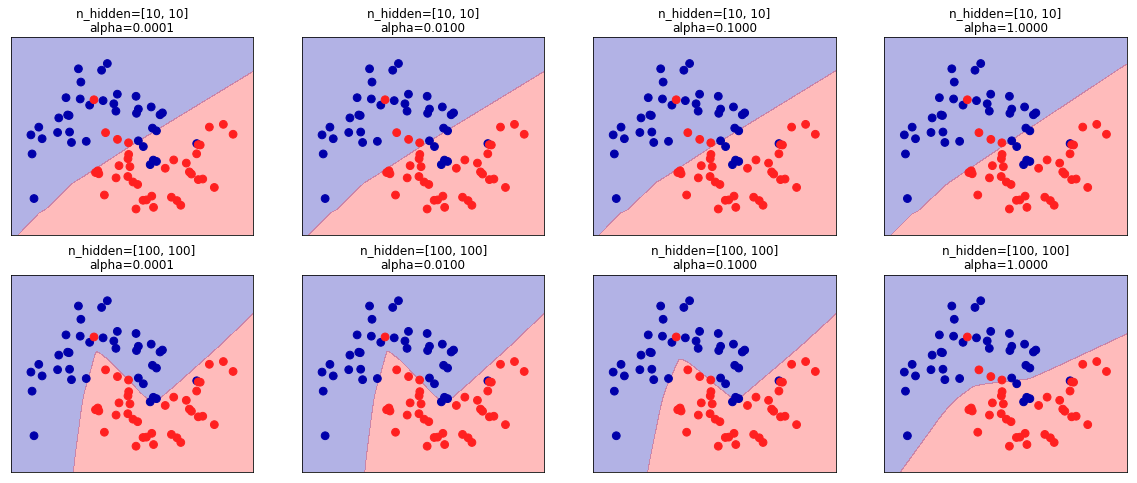

In [5]:
#parameter tuning
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for ax, n_hidden_nodes in zip(axes, [10, 100]):
    for axx, alpha in zip(ax, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(random_state=0,hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=axx)
        axx.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=60, cmap=mglearn.cm2)
        axx.set_title("n_hidden=[%d, %d]\nalpha=%.4f" % (n_hidden_nodes, n_hidden_nodes, alpha))

In [6]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
print("accuracy on training set: %f" % mlp.score(X_train, y_train))
print("accuracy on test set: %f" % mlp.score(X_test, y_test))

accuracy on training set: 0.910798
accuracy on test set: 0.902098


In [7]:
# compute the mean value per feature on the training set
mean_on_train = X_train.mean(axis=0)
# compute the standard deviation of each feature on the training set
std_on_train = X_train.std(axis=0)
# subtract the mean, scale by inverse standard deviation
# afterwards, mean=0 and std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
# use THE SAME transformation (using training mean and std) on the test set
X_test_scaled = (X_test - mean_on_train) / std_on_train
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)
print("accuracy on training set: %f" % mlp.score(X_train_scaled, y_train))
print("accuracy on test set: %f" % mlp.score(X_test_scaled, y_test))

accuracy on training set: 0.990610
accuracy on test set: 0.965035


C:\Users\I334934\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [8]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("accuracy on training set: %f" % mlp.score(X_train_scaled, y_train))
print("accuracy on test set: %f" % mlp.score(X_test_scaled, y_test))

accuracy on training set: 0.988263
accuracy on test set: 0.972028
